# Plotting Lossy Compression vs Original Data

This notebook reads in some surface temperature (`TS`) and precipitation (`PRECT`) data from the atmosphere.
The data comes from a CESM large ensemble run.

In [1]:
# Add ldcpy root to system path
import sys
sys.path.append('..')

# Import ldcpy package
import ldcpy
%matplotlib inline

## Open datasets for reading

`open_datasets()` is a wrapper to `xr.open_dataset()` and `xr.concat()` that probably mimics behavior from `xr.open_mfdataset()`. It adds an `ensemble` coordinate to help users track which slice comes from which file.

For this notebook, we will read in original data as well as two levels of compression from `TS` and `PRECT` data. The way the `data/` is organized, this means reading 6 separate files.

In [2]:
# ds contains TS data
ds = ldcpy.open_datasets(['../data/orig.TS.100days.nc', '../data/zfp1.0.TS.100days.nc', '../data/zfp1e-1.TS.100days.nc'],
                         ['orig', 'recon', 'recon_2'])
ds

<xarray.Dataset>
Dimensions:    (ensemble: 3, ilev: 31, lat: 192, lev: 30, lon: 288, nbnd: 2, time: 100)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time       (time) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * ensemble   (ensemble) <U7 'orig' 'recon' 'recon_2'
Dimensions without coordinates: nbnd
Data variables:
    hyai       (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    P0         float64 1e+05
    hyam       (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybi       (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    gw         (lat) float64 3.382e-05 0.0002705 ... 0.0002705 3.382e-05
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 

In [3]:
# ds2 contains PRECT data
ds2 = ldcpy.open_datasets(['../data/orig.PRECT.100days.nc', '../data/zfp1e-7.PRECT.100days.nc', '../data/zfp1e-11.PRECT.100days.nc'],
                         ['orig', 'recon', 'recon_2'])
ds2

<xarray.Dataset>
Dimensions:    (ensemble: 3, ilev: 31, lat: 192, lev: 30, lon: 288, nbnd: 2, time: 100)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time       (time) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * ensemble   (ensemble) <U7 'orig' 'recon' 'recon_2'
Dimensions without coordinates: nbnd
Data variables:
    hyai       (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    P0         float64 1e+05
    hyam       (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybi       (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    gw         (lat) float64 3.382e-05 0.0002705 ... 0.0002705 3.382e-05
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 

#### Revisiting Mo's error metric class

The `ldcpy` library includes a wrapper to the `ErrorMetric` class to make it easy to print stats from comparing a compressed file to the original dataset. Below we compare both levels of compression in TS to the original

In [4]:
ldcpy.print_stats(ds, 'TS', 'orig', 'recon')
print('----')
ldcpy.print_stats(ds, 'TS', 'orig', 'recon_2')

Comparing orig data to recon data
{
    "mean_absolute_error": 0.05852021166571864,
    "mean_observed": 274.7137027669836,
    "max_error": 0.4058837890625,
    "pearson_correlation_coefficient": 0.9999947706571547,
    "ks_p_value": [
        0.9999947706571544,
        0.0
    ],
    "variance_modelled": 533.680828155477,
    "mean_error": 0.00576729244656033,
    "standard_deviation_observed": 23.10856581306422,
    "root_mean_squared_error": 0.07527297655350516,
    "min_error": -0.361724853515625,
    "mean_modelled": 274.707935474537,
    "variance_observed": 533.680828155477,
    "standard_deviation_modelled": 23.10856581306422,
    "mean_squared_erro": 0.005666020999224538,
    "covariance": 533.8405046664303
}
----
Comparing orig data to recon_2 data
{
    "mean_absolute_error": 0.004226026711640535,
    "mean_observed": 274.7137027669836,
    "max_error": 0.022918701171875,
    "pearson_correlation_coefficient": 0.9999999736752675,
    "ks_p_value": [
        0.9999999736752

## Plots!

There are a few different plots available.

#### Comparing the mean of two fields

On the left is the original `TS` dataset, on the right is one of the compressed datasets

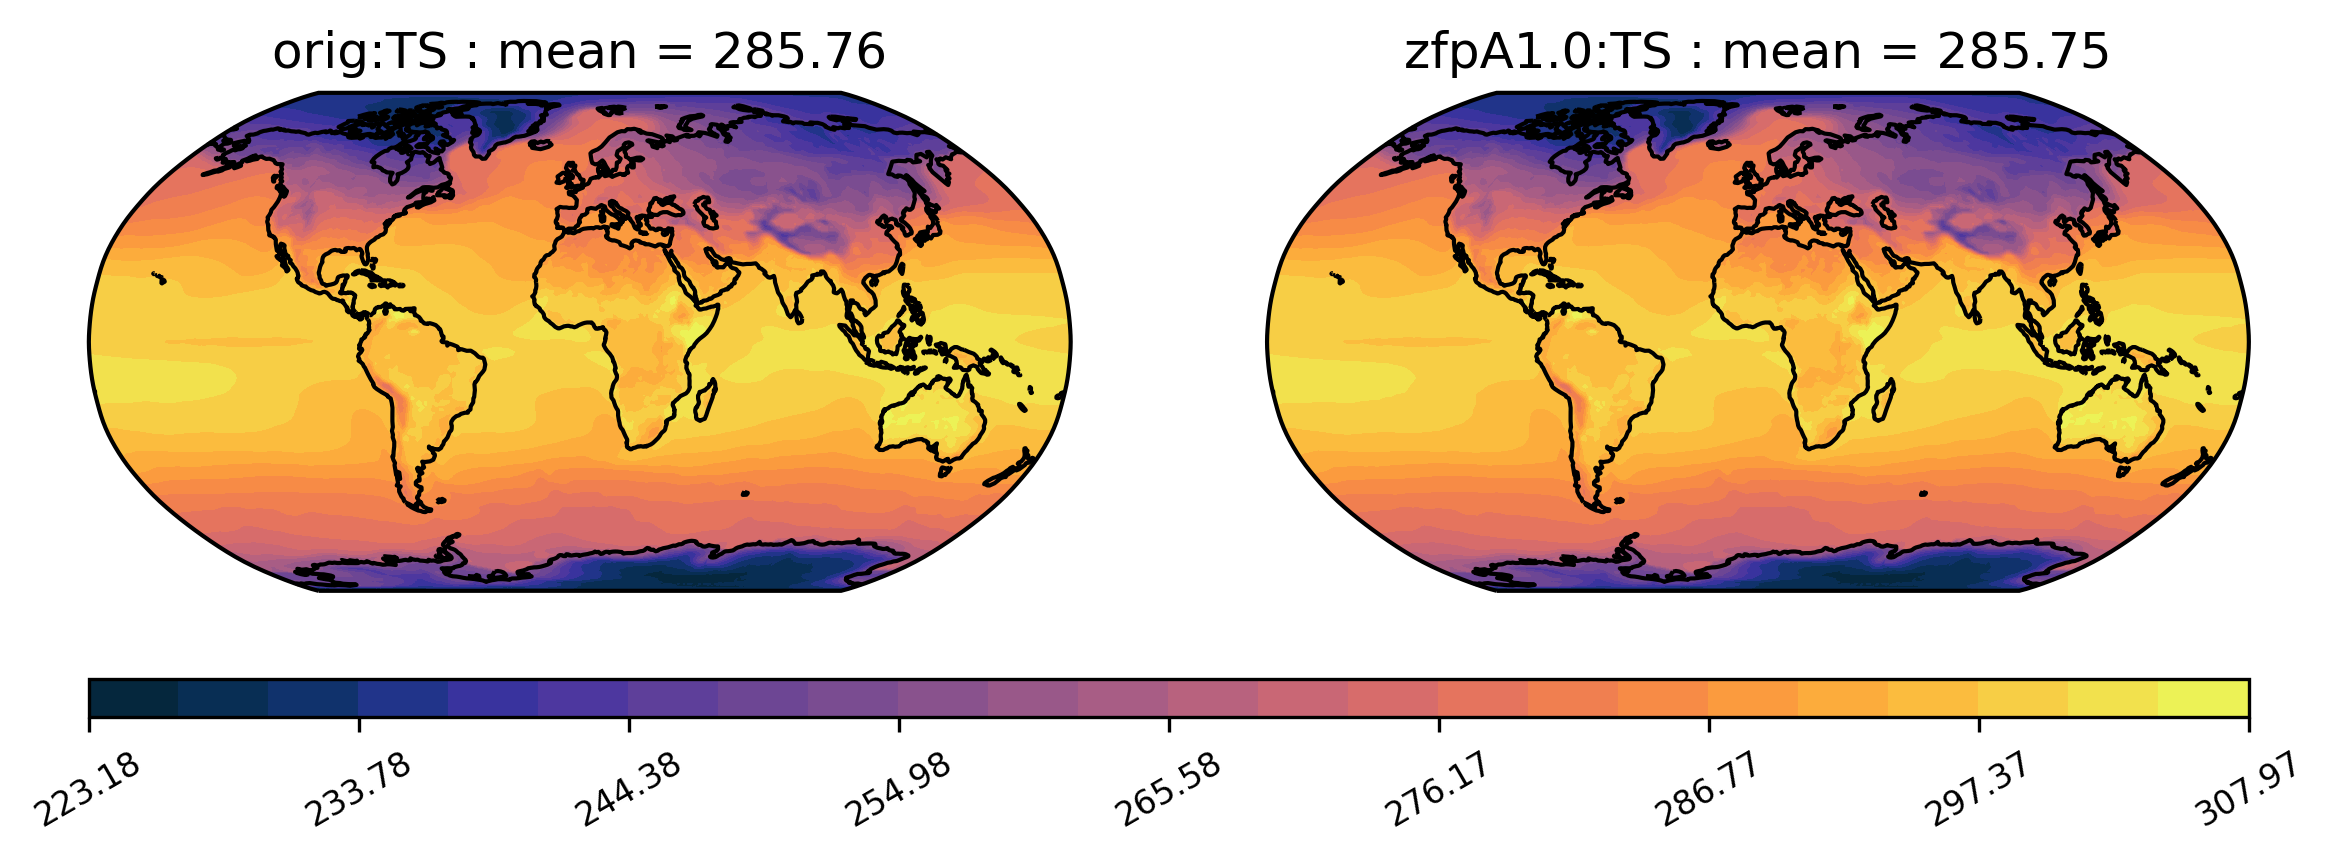

In [5]:
ldcpy.plot.compare_mean(ds, 'TS', 'orig', 'recon', 'zfpA1.0')

#### Comparing standard deviation

We should check to see if the temporal variability changes under compression.
In these plots we're looking at 100 days (of `TS`) rather than the full 160 years of data that's available,
so the difference in standard deviation isn't very large.

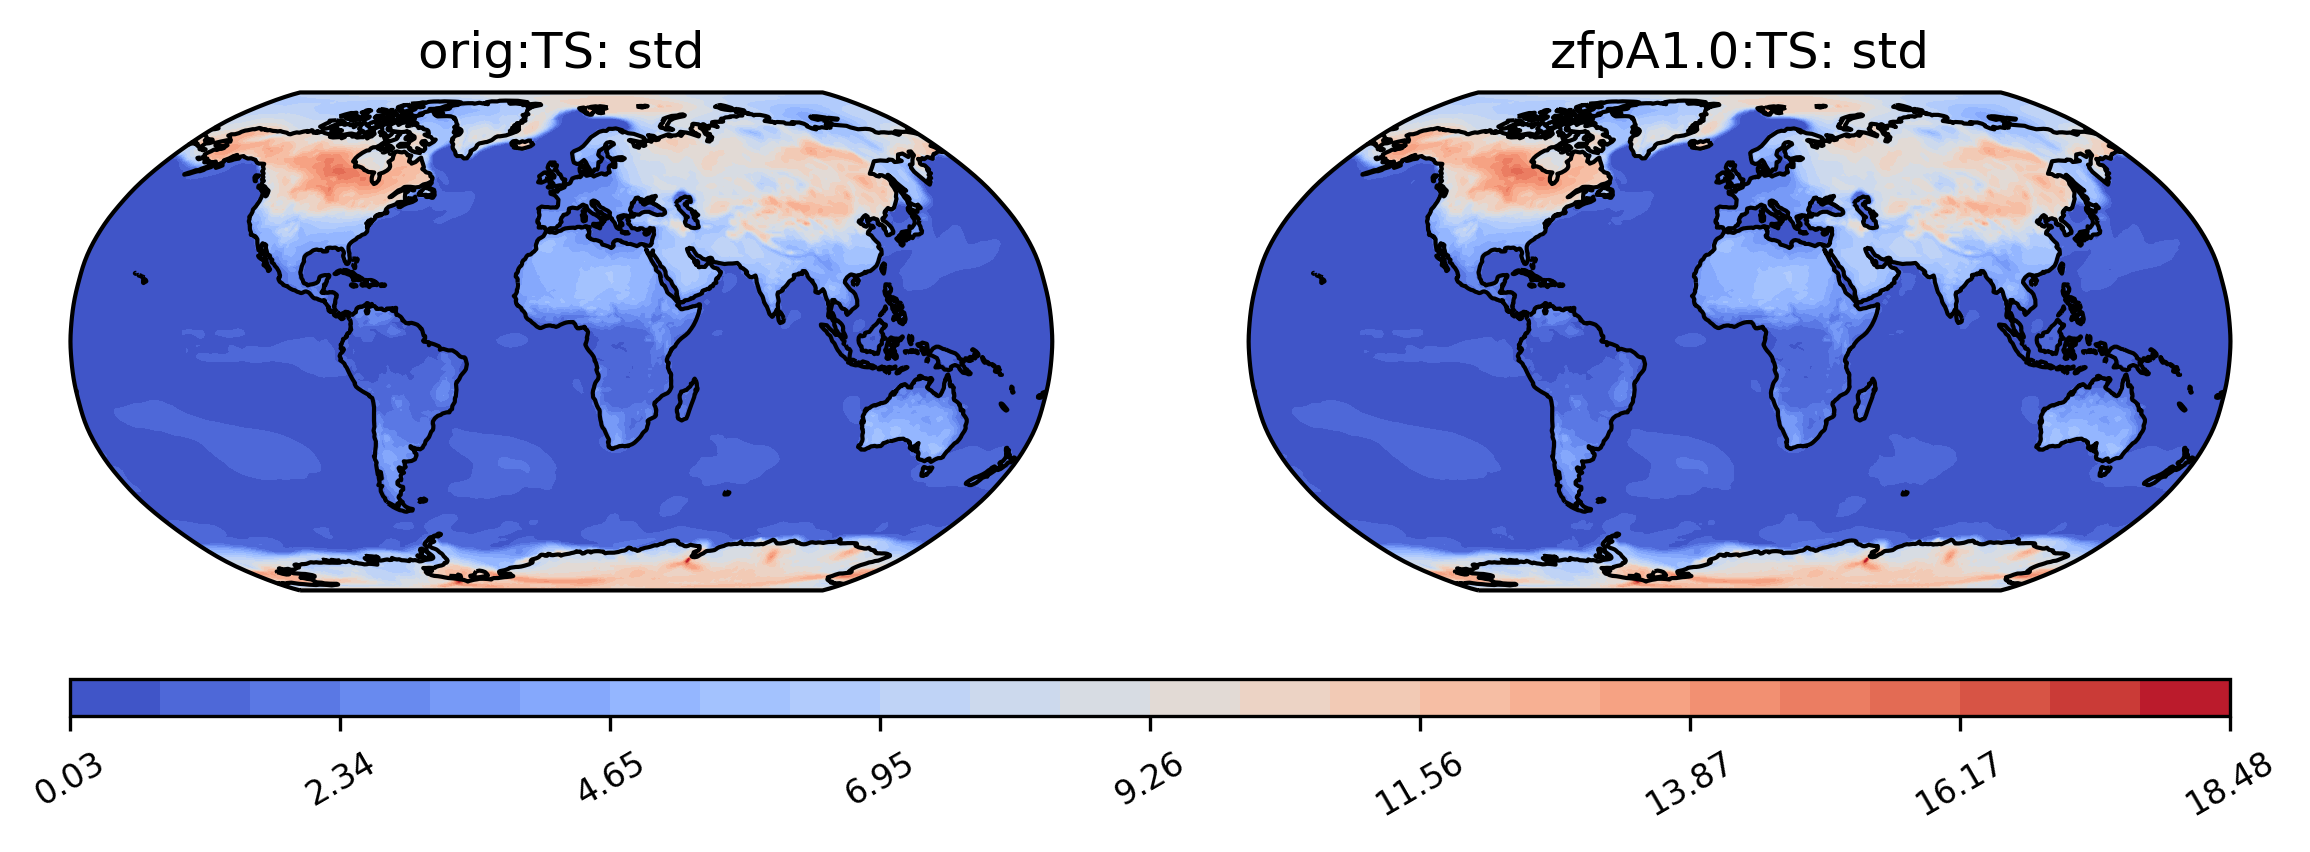

In [6]:
ldcpy.plot.compare_std(ds, 'TS', 'orig', 'recon', 'zfpA1.0')

#### Plotting the error (compressed - original)

We can also take the time mean of the error between compressed and uncompressed data.
Below are the mean errors from the two levels of compression for `TS`.

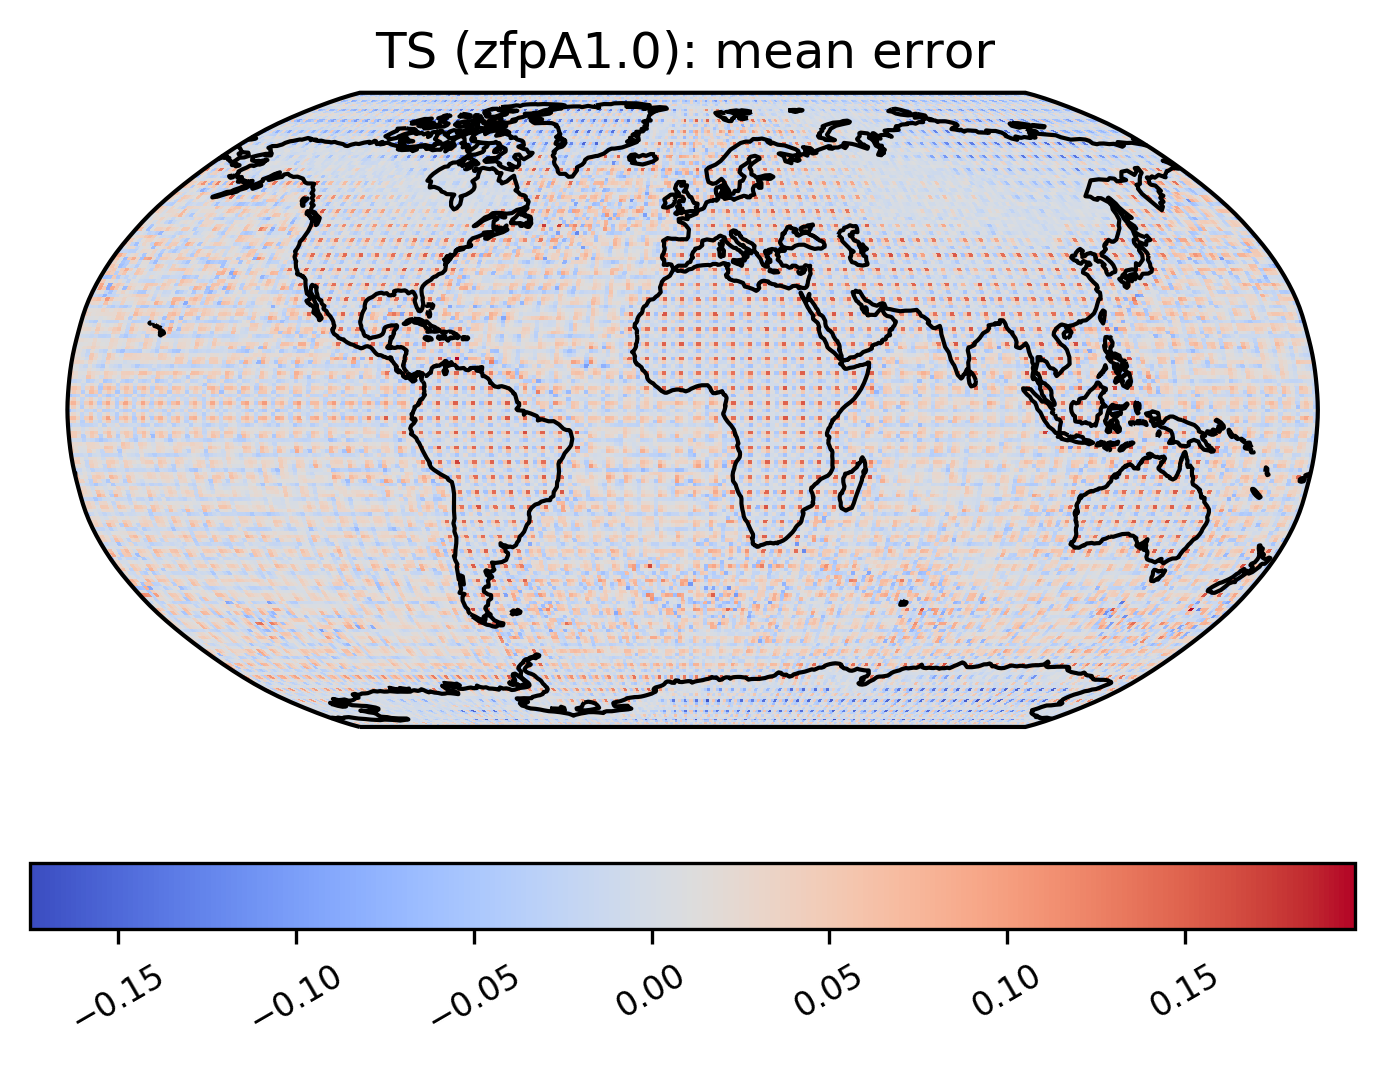

In [7]:
ldcpy.plot.mean_error(ds, 'TS', 'orig', 'recon', 'zfpA1.0')

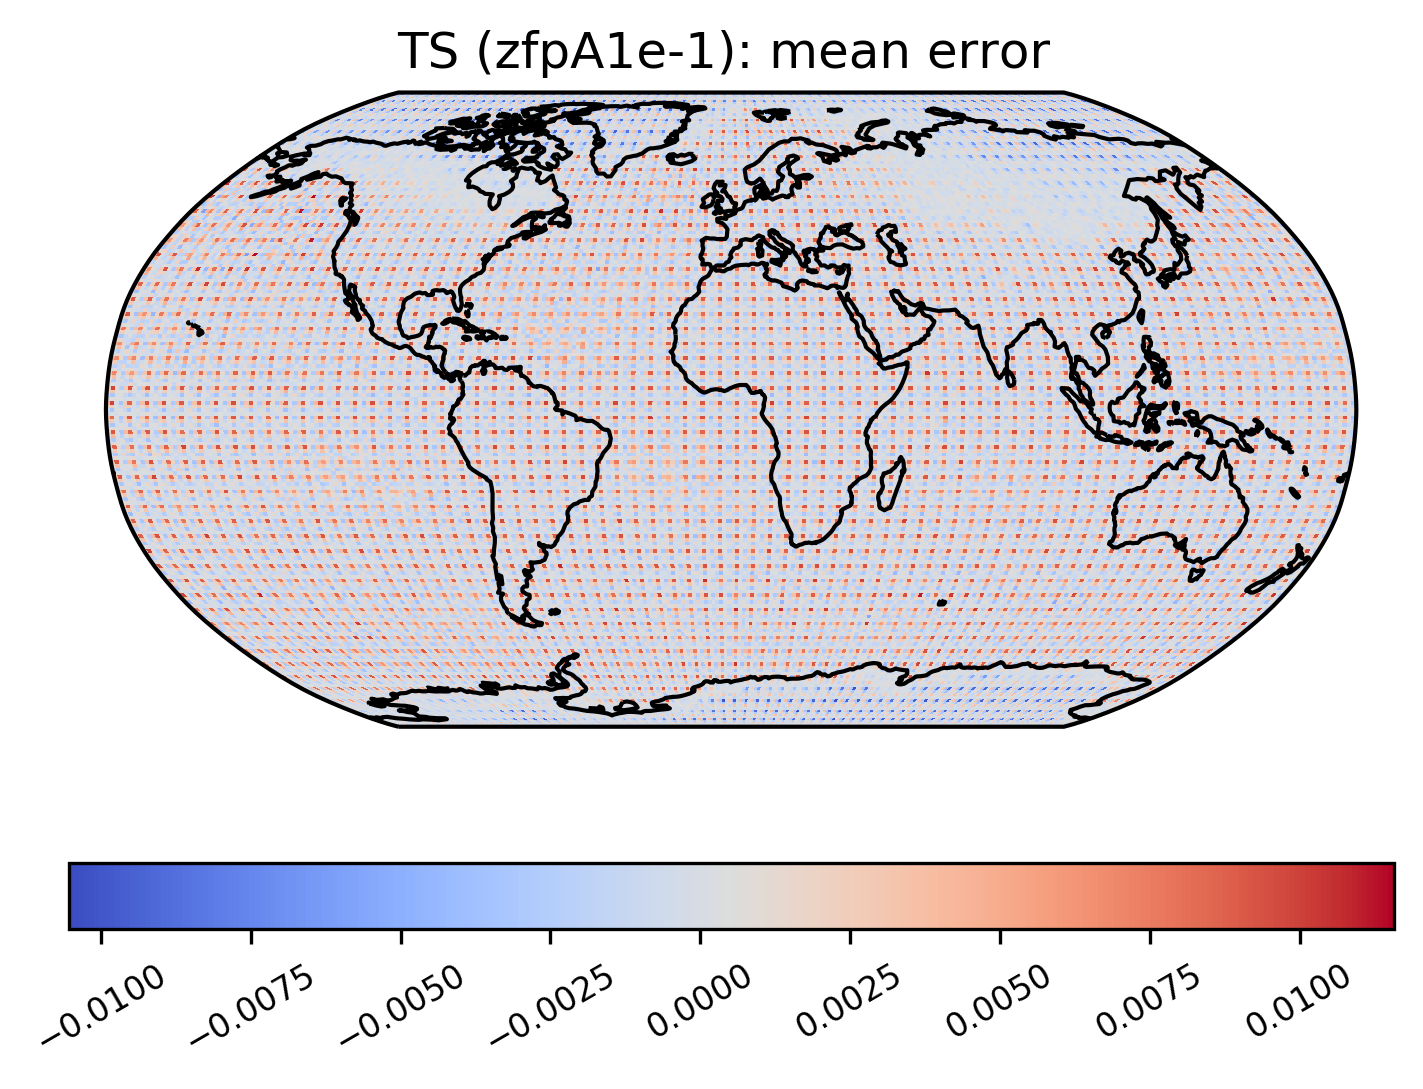

In [8]:
ldcpy.plot.mean_error(ds, 'TS', 'orig', 'recon_2', 'zfpA1e-1')

#### Time series plots

Coming soon?
(We were hoping this function would be ready, it would be the time series of the error at a specified point.)

In [9]:
ldcpy.plot.error_time_series(ds, 'TS', 'orig', 'recon')

## PRECT and "bad" compression

For `PRECT` we tried to show what happens when you compress too much.

#### Plots

The first plot shows this "bad" compression, though it looks okay in the eyeball norm.
(The second plot shows the same comparison with better compression).

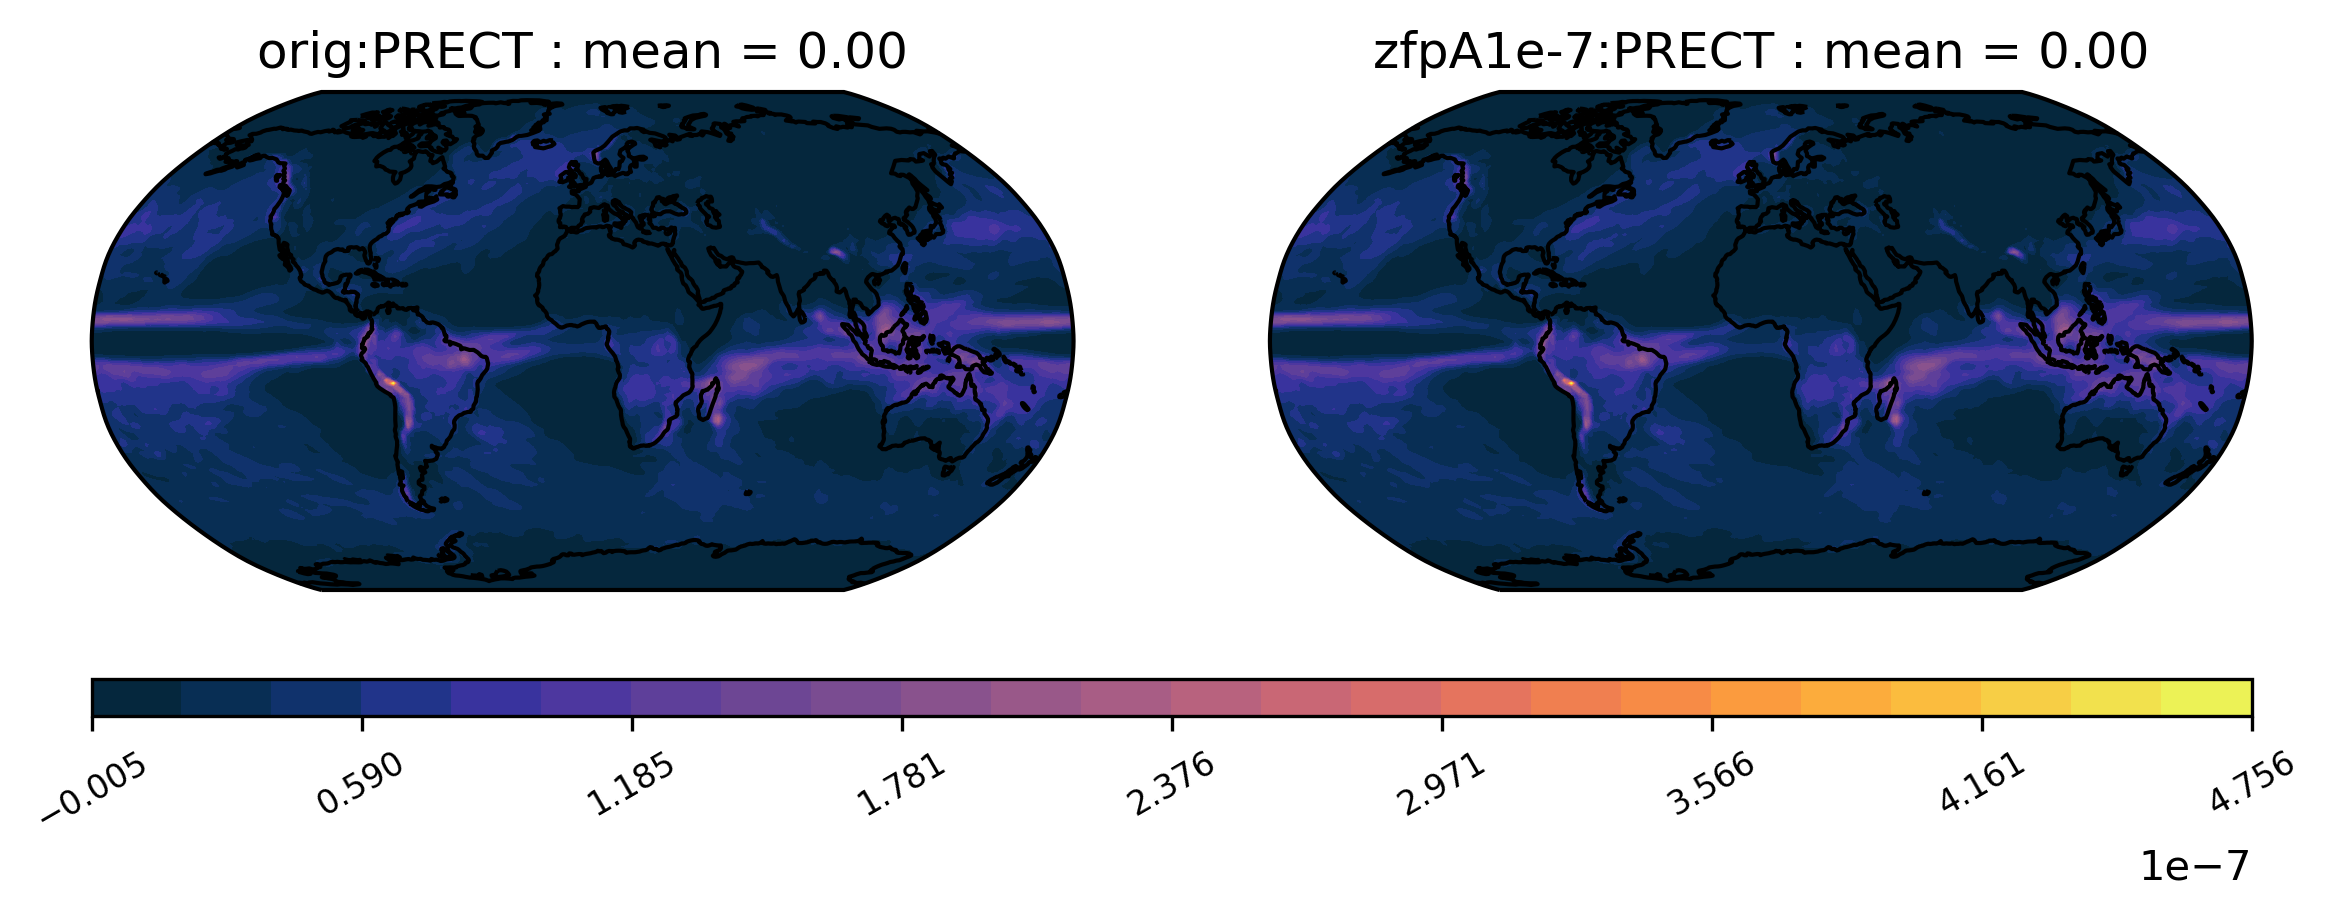

In [10]:
ldcpy.plot.compare_mean(ds2, 'PRECT', 'orig', 'recon', 'zfpA1e-7')

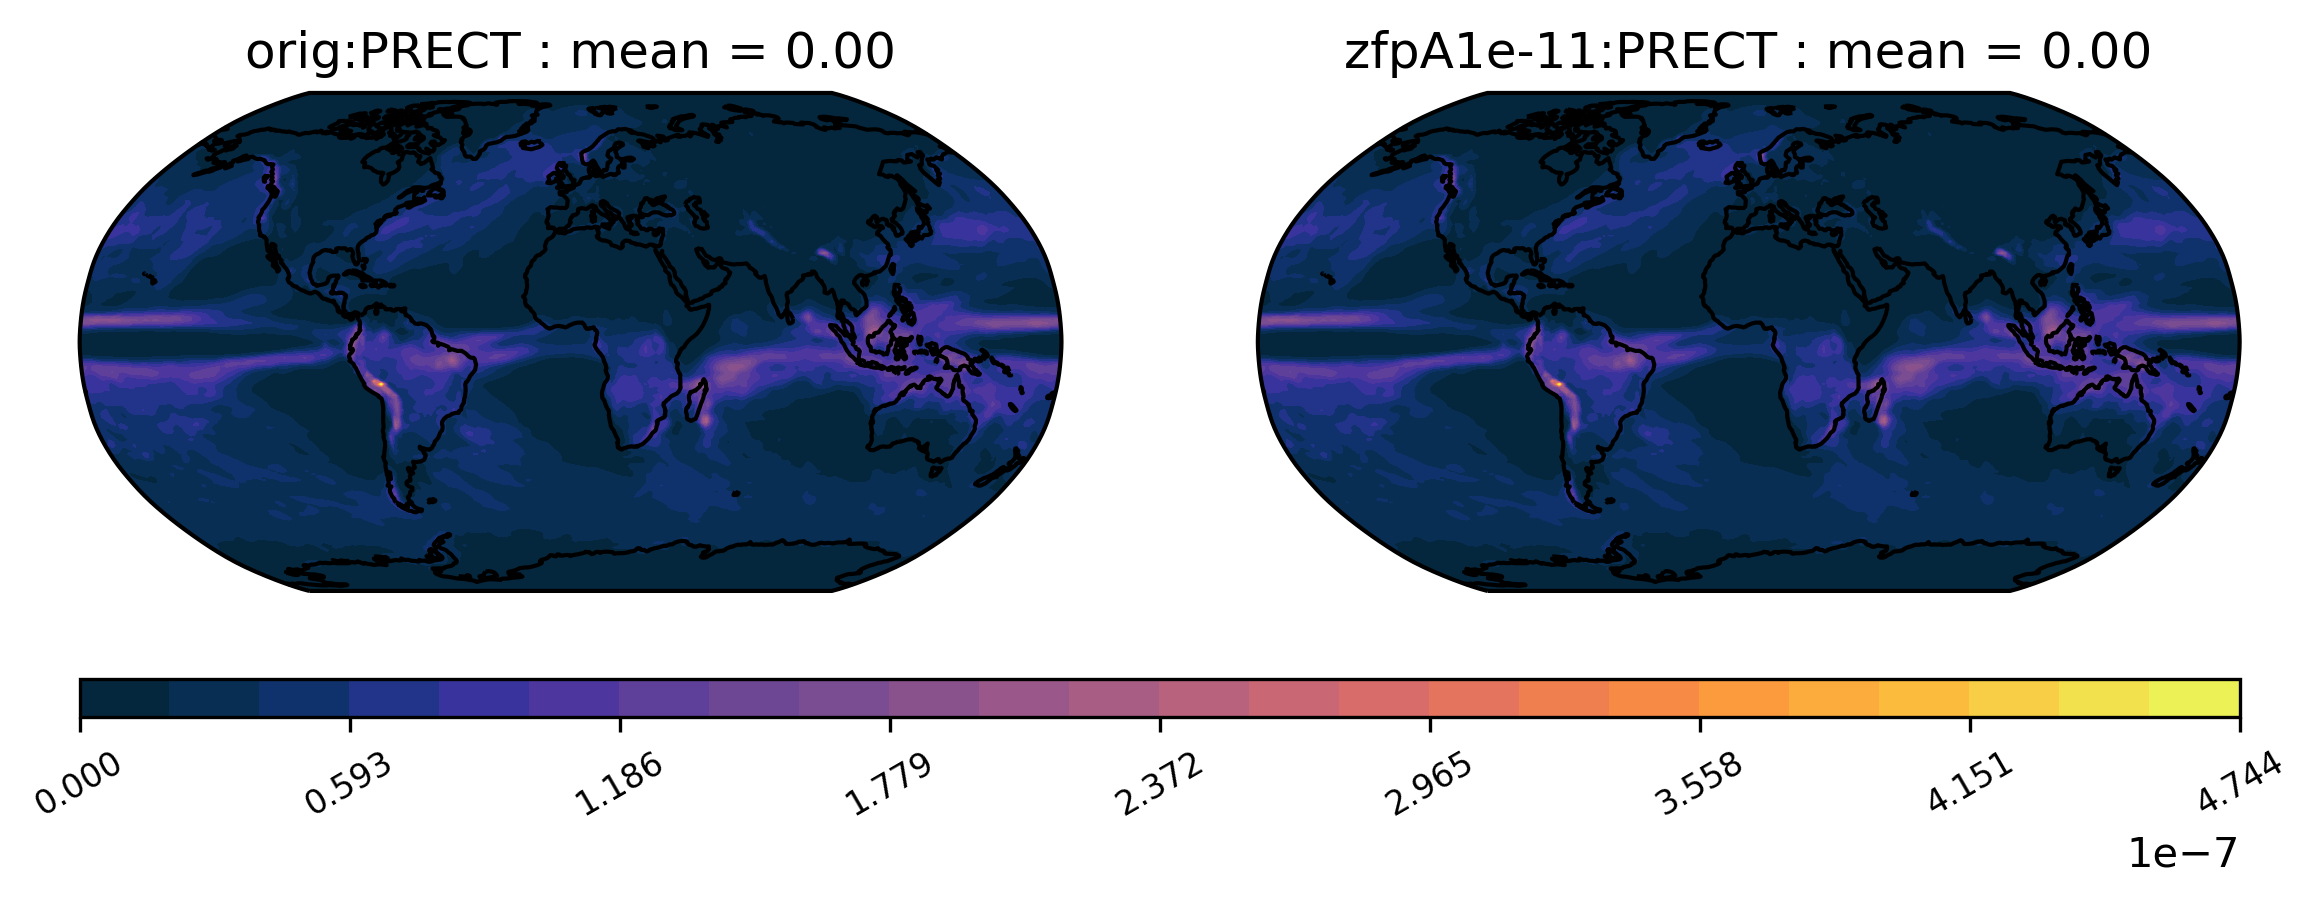

In [11]:
ldcpy.plot.compare_mean(ds2, 'PRECT', 'orig', 'recon_2', 'zfpA1e-11')

#### Statistical Comparison

Note that the RMSE is much larger for the bad compression than the good compression.
The number reported is absolute RMSE, but it's large relative to the `O(1e-7)` data.

In [12]:
ldcpy.print_stats(ds2, 'PRECT', 'orig', 'recon')
print('----')
ldcpy.print_stats(ds2, 'PRECT', 'orig', 'recon_2')

Comparing orig data to recon data
{
    "mean_absolute_error": 2.2880570175236454e-09,
    "mean_observed": 2.3052133169208565e-08,
    "max_error": 1.9644747162317344e-08,
    "pearson_correlation_coefficient": 0.99854817863829,
    "ks_p_value": [
        0.9985481786382909,
        0.0
    ],
    "variance_modelled": 4.635949981591499e-15,
    "mean_error": 5.902918874239642e-11,
    "standard_deviation_observed": 6.795656508229702e-08,
    "root_mean_squared_error": 3.668229093860421e-09,
    "min_error": -2.1862296029073747e-08,
    "mean_modelled": 2.2993103980466172e-08,
    "variance_observed": 4.635949981591499e-15,
    "standard_deviation_modelled": 6.795656508229702e-08,
    "mean_squared_erro": 1.3455904685044047e-17,
    "covariance": 4.620296149568025e-15
}
----
Comparing orig data to recon_2 data
{
    "mean_absolute_error": 4.556197167362233e-13,
    "mean_observed": 2.3052133169208565e-08,
    "max_error": 2.8243934968585904e-12,
    "pearson_correlation_coefficient": 

#### One more set of plots

Also, we can look at plots of the error.

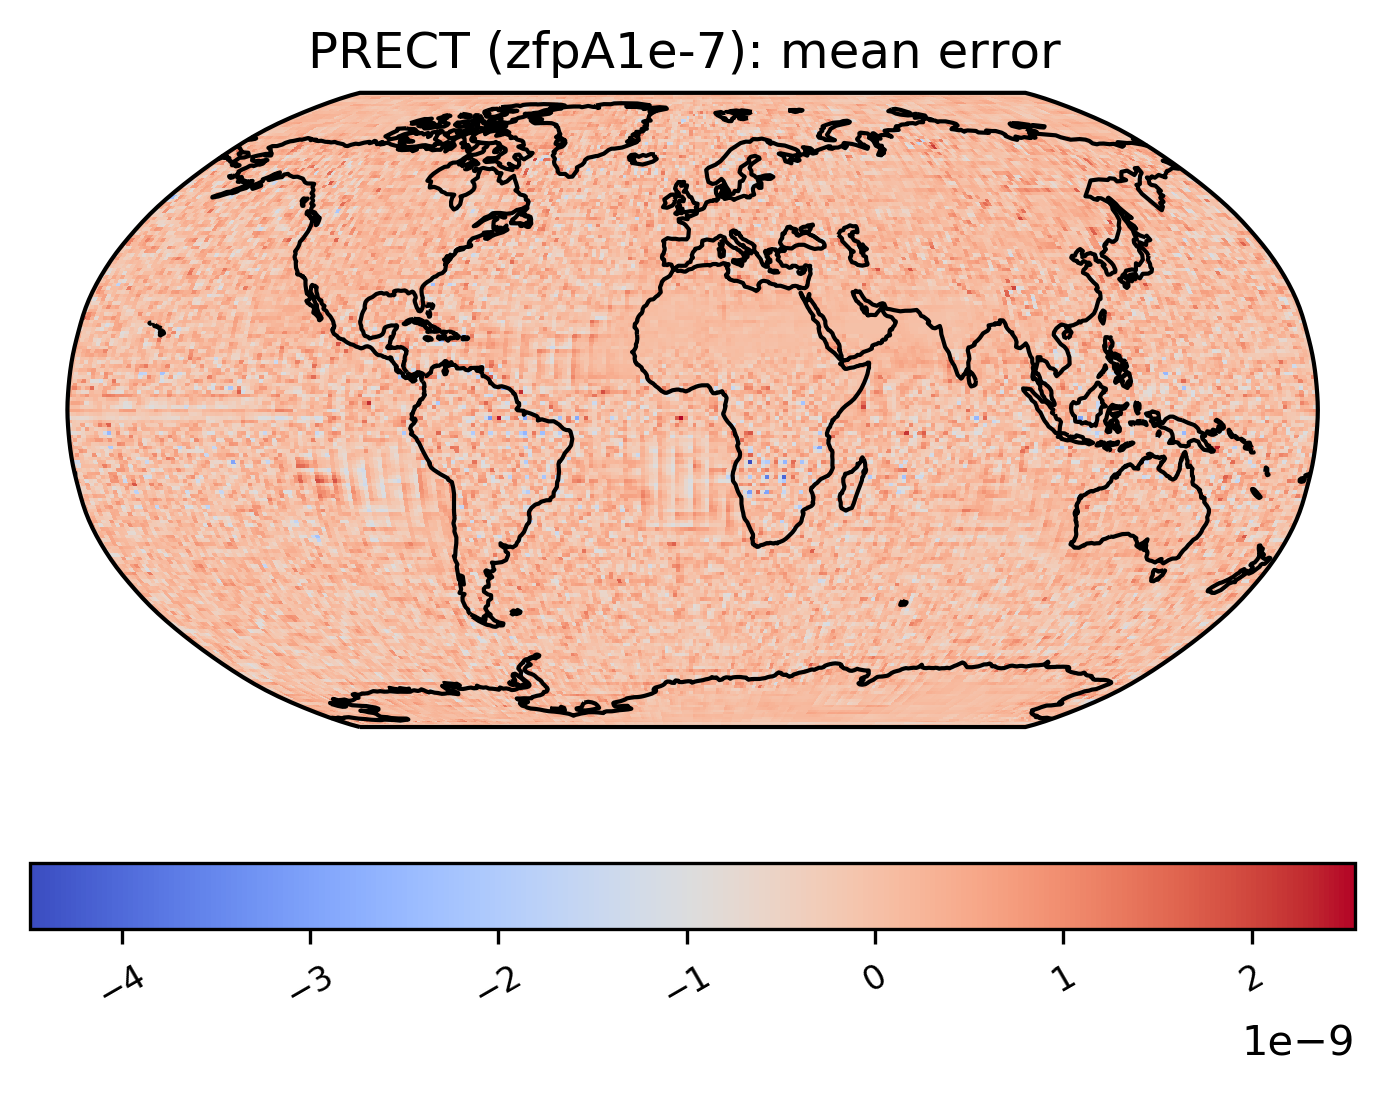

In [13]:
ldcpy.plot.mean_error(ds2, 'PRECT', 'orig', 'recon', 'zfpA1e-7')

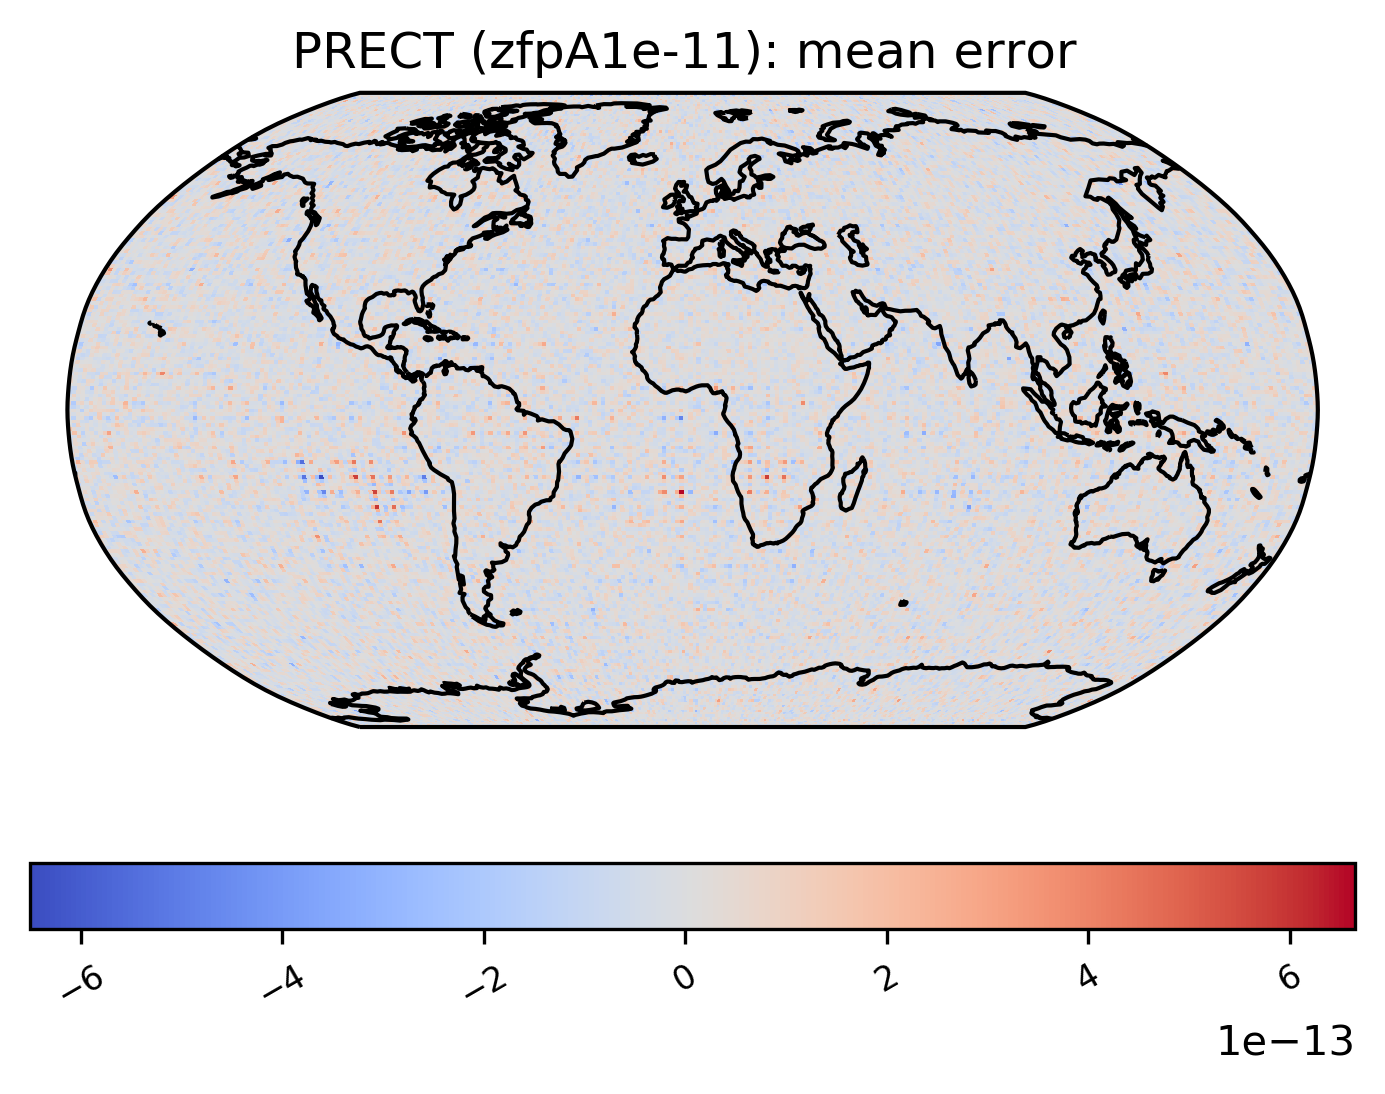

In [14]:
ldcpy.plot.mean_error(ds2, 'PRECT', 'orig', 'recon_2', 'zfpA1e-11')